# **Question 1 - Number of folds**

In [4]:
import math
import matplotlib.pyplot as peaceplt
import pandas as peacepd
# import numpy as peacenp
from scipy.interpolate import interp1d as peacep1d
from google.colab import drive
from datetime import datetime

In [5]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:
#convert paper thickness of 1mm to meters for easy comparison with the height of Mount Everest
paper_thickness_in_meters = 1 * (10 ** -3)

#create a variable and assign the height of Mount Everest to it.
mount_everest = 8848

#this counts the number of folds to exceed Mount Everest's height
count = 0

In [7]:
#paper thickness doubles up each time folding is done i.e. 2 layers of the original layer
new_thickness = paper_thickness_in_meters
while(new_thickness < mount_everest):
  new_thickness *= 2
  count += 1

print(count)

24


# **Question 2 - Decay Process**


In [8]:
#assign the value of a in the question to variable named a
a = 0.1

#initialize the initial volume and assign it to a variable called current volume
initial_volume = 1.0
current_volume = initial_volume

#expected volume to decrease to
expected_volume = current_volume / 2

#initialize time and time increment
time = 0.0
time_increment = 0.001

while (expected_volume < current_volume):
  current_volume = initial_volume * math.exp(-a * time)
  time += time_increment

print(time)

6.93300000000065


# **Question 3 - Annual Compound Interest**

In [9]:
#initialize principal, rate and time in years
principal = 100
rate = 5 / 100
time = 5

def investment_amount(principal, rate, time):
  #initialize amount (principal + interest) for the first year with the principal as the total_amount
  total_amount_per_year = principal

  #create a list to store each total amount per year
  total_amounts = {}

  for i in range (1, time + 1):
    total_amount_per_year += total_amount_per_year * rate
    total_amounts[f"Year {i}"] = round(total_amount_per_year)
  return total_amounts

amount_yield = investment_amount(principal, rate, time)
print("{")
for j, k in amount_yield.items():
  print(f"    '{j}': '{k}',")
print("}")

{
    'Year 1': '105',
    'Year 2': '110',
    'Year 3': '116',
    'Year 4': '122',
    'Year 5': '128',
}


# **Question 4 - Loan monthly repayment**

In [10]:
principal = 20000
rate = 1 / 100
time_in_years = 3

def loan_repayment(principal, rate, time):
  yearly_repayment = {}

  for i in range (1, time + 1):
    month_per_year = i * 12
    balance_from_loan = principal
    monthly_payment = 0

    monthly_payment = principal / month_per_year
    for a in range (month_per_year):
      interest = balance_from_loan * rate
      balance_from_loan += interest - monthly_payment

    monthly_payment = (principal + balance_from_loan) / month_per_year

    yearly_repayment[f"Year {i}"] = round(monthly_payment)

  return yearly_repayment

loan_payment = loan_repayment(principal, rate, time_in_years)
print("{")
for j, k in loan_payment.items():
  print(f"    '{j}': '{k}',")
print("}")



{
    'Year 1': '1783',
    'Year 2': '955',
    'Year 3': '686',
}


# **Question 5 - Business Investment**

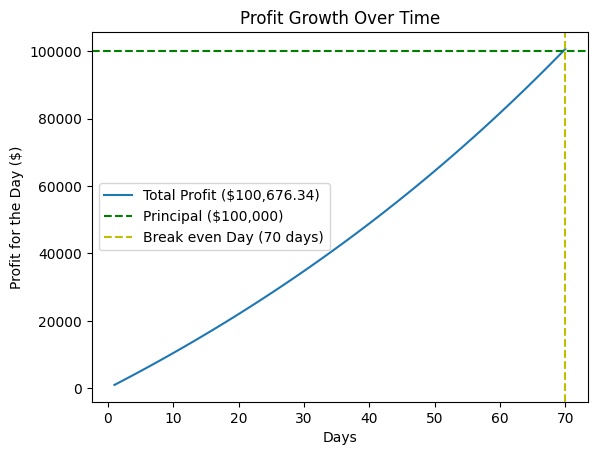

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70]


In [11]:
principal = 100000
starting_customers = 100
customer_growth_rate_per_day = 1 / 100
profit_from_each_customer = 10
breakeven_day = None

profit = 0
number_of_customers = starting_customers
day = 1
last_profit = 0
days = []
profits = []

peaceplt.ion()

while profit < principal:
  profit += number_of_customers * profit_from_each_customer

  last_profit = profit
  profits.append(profit)
  days.append(day)

  if(profit >= principal and breakeven_day is None):
    breakeven_day = day

  number_of_customers += number_of_customers * customer_growth_rate_per_day
  day += 1

#Plot Graph
peaceplt.plot(days, profits, label=f"Total Profit (${last_profit:,.2f})")
peaceplt.axhline(y=principal, color='g', linestyle='--', label="Principal ($100,000)")
peaceplt.axvline(x=breakeven_day, color='y', linestyle='--', label=f"Break even Day ({breakeven_day} days)")

peaceplt.xlabel("Days")
peaceplt.ylabel("Profit for the Day ($)")
peaceplt.title("Profit Growth Over Time")
peaceplt.legend()

peaceplt.draw()
peaceplt.pause(0.5)

peaceplt.show()

print(days)

# **Question 6 - Data & Linear Interpolation**

In [12]:
#Read Ebola Data
e_data = peacepd.read_excel('ebola_download.xls')

In [13]:
#Extract the date, deaths and cases columns
dates = e_data['Date']
deaths = e_data['Death']
cases = e_data['Cases']

In [14]:
e_data.head()

,Date,Cases,Death,Diff,Noofdays
0,2014-03-22,49,29,2,1
1,2014-03-24,86,59,1,3
2,2014-03-25,86,60,1,4
3,2014-03-26,86,62,1,5
4,2014-03-27,111,72,1,6


The Threshold Dates are listed below 
           0
0 2014-03-27
1 2014-06-13
2 2014-07-15
3 2014-08-12
4 2014-09-12
5 2014-04-06
6 2014-07-05
7 2014-08-09
8 2014-09-03
9 2014-10-24


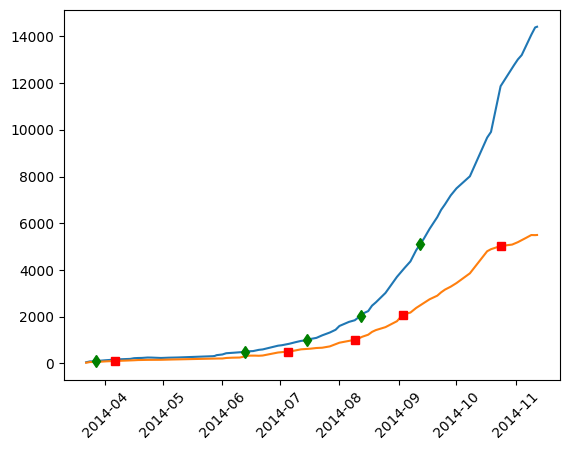

In [15]:
#Generate New Date Range a"nd Autofill with NaN
date_range = peacepd.date_range(start=dates.min(), end=dates.max())
date_range_df = peacepd.DataFrame(date_range, columns =["Date"])
new_ebola_df = peacepd.merge(e_data, date_range_df , how="right", on=["Date"])
new_ebola_df = new_ebola_df.iloc[ : , [0,1,2] ]

#Interpolation
new_ebola_df = new_ebola_df.interpolate()
new_ebola_df.tail()
peaceplt.plot(new_ebola_df["Date"], new_ebola_df["Cases"])
peaceplt.plot(new_ebola_df["Date"], new_ebola_df["Death"])
peaceplt.xticks(rotation = 45)

thresholds = [100, 500, 1000, 2000, 5000]
dates = []

def get_thresholds(thresholds, column_name):
  for each_threshold in thresholds:
    greater_threshold = new_ebola_df[new_ebola_df[column_name] >= each_threshold]
    greater_threshold_date = greater_threshold["Date"].iloc[0]
    greater_threshold_value = greater_threshold[column_name].iloc[0]
    dates.append(greater_threshold_date)

    if(column_name == "Cases"):
      peaceplt.plot(greater_threshold_date, greater_threshold_value, 'gd', label=f"{column_name} >= {each_threshold}")
    else:
      peaceplt.plot(greater_threshold_date, greater_threshold_value, 'rs', label=f"{column_name} >= {each_threshold}")
  return dates

case_dates = peacepd.DataFrame(get_thresholds(thresholds, "Cases"))
death_dates = peacepd.DataFrame(get_thresholds(thresholds, "Death"))

# print(case_dates)
print(f"The Threshold Dates are listed below \n{death_dates}")

# **Question 7 - Average Growth Rate per day**

In [16]:
pct_cases_death = new_ebola_df[["Cases", "Death"]].pct_change()
pct_cases_death.head()

average = {}

average['Cases'] = pct_cases_death.mean()['Cases'] * 100
average['Death'] = (pct_cases_death.mean()['Death'] * 100)

print(average)

{'Cases': 2.5065218916499954, 'Death': 2.3306080833679683}


# **Question 8 - Deaths versus Cases**

0.5577992908998353


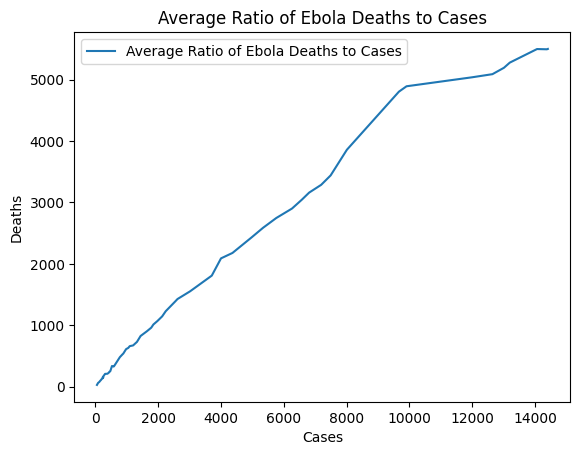

In [17]:
death_cases = new_ebola_df[["Cases", "Death"]]

death_cases['Death Ratio'] = (death_cases['Death'] / death_cases['Cases'])
death_ratio = death_cases['Death Ratio'].mean()
print(death_ratio)

peaceplt.plot(death_cases['Cases'], death_cases['Death'], label=f"Average Ratio of Ebola Deaths to Cases")

peaceplt.xlabel("Cases")
peaceplt.ylabel("Deaths")
peaceplt.title("Average Ratio of Ebola Deaths to Cases")
peaceplt.legend()

peaceplt.draw()
peaceplt.pause(0.5)

peaceplt.show()

# **Question 9**

In [18]:
# Read data
spy_data = peacepd.read_csv('SPY.csv')
tlt_data = peacepd.read_csv('TLT.csv')

In [19]:
# spy_data.head()
adj_close_df = spy_data[['Date', 'Adj Close']]

def adjust_close_to_hundred(df):
  df['adjusted'] = df['Adj Close'] / df['Adj Close'].iloc[0] * 100
  return df

spy_adj_close_df = adjust_close_to_hundred(adj_close_df)
spy_adj_close_df.head()

<ipython-input-19-b365b31d620a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['adjusted'] = df['Adj Close'] / df['Adj Close'].iloc[0] * 100


,Date,Adj Close,adjusted
0,2013-12-31,157.853638,100.000000
1,2014-01-02,156.340836,99.041643
2,2014-01-03,156.315201,99.025403
3,2014-01-06,155.862137,98.738388
4,2014-01-07,156.819412,99.344820


In [20]:
# tlt_data.head()
tlt_adj_close_df = tlt_data[['Date', 'Adj Close']]

tlt_adj_close_df = adjust_close_to_hundred(tlt_adj_close_df)

<ipython-input-19-b365b31d620a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['adjusted'] = df['Adj Close'] / df['Adj Close'].iloc[0] * 100


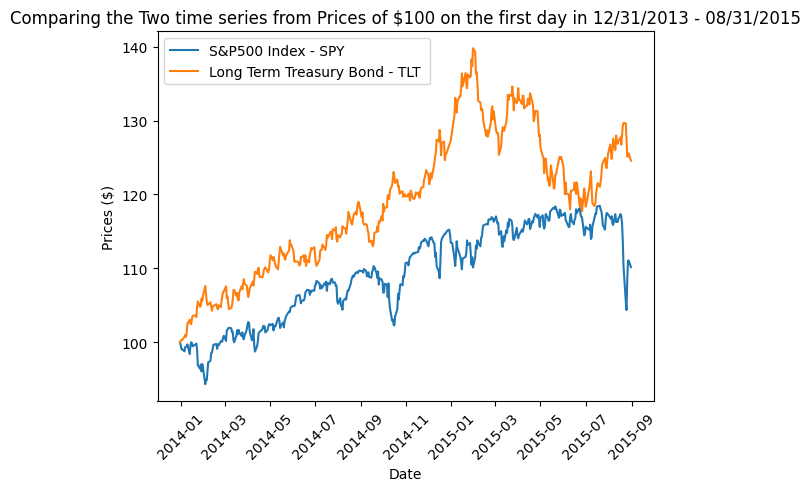

In [21]:
# Plot the graph
peaceplt.plot(peacepd.to_datetime(spy_adj_close_df['Date']), spy_adj_close_df['adjusted'], label=f"S&P500 Index - SPY")
peaceplt.plot(peacepd.to_datetime(tlt_adj_close_df['Date']), tlt_adj_close_df['adjusted'], label=f"Long Term Treasury Bond - TLT ")


peaceplt.xlabel("Date")
peaceplt.ylabel("Prices ($)")
peaceplt.title("Comparing the Two time series from Prices of $100 on the first day in 12/31/2013 - 08/31/2015")
peaceplt.legend()
peaceplt.xticks(rotation = 45)

peaceplt.draw()

peaceplt.show()

In [22]:
tlt_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-31,102.290001,102.550003,101.169998,101.860001,83.814583,7218600
1,2014-01-02,101.720001,102.389999,101.690002,102.169998,84.069664,8580800
2,2014-01-03,101.809998,102.449997,101.760002,102.169998,84.069664,4083800
3,2014-01-06,102.379997,103.000000,102.370003,102.599998,84.423508,7796200
4,2014-01-07,102.820000,102.989998,102.559998,102.860001,84.637466,4428100


# **Question 10**

In [23]:
spy_data_stats = spy_data['Adj Close'].pct_change()
spy_data_description = spy_data_stats.describe()


tlt_data_stats = tlt_data['Adj Close'].pct_change()
tlt_data_description = tlt_data_stats.describe()

print(f"Average, Min, Max and general description of S&P500 Data \n {spy_data_description}")
print("\n")
print(f"Average, Min, Max and general description of Long-Term Treasury Bond Data \n {tlt_data_description}")

Average, Min, Max and general description of S&P500 Data 
 count    419.000000
mean       0.000263
std        0.008007
min       -0.042107
25%       -0.003915
50%        0.000546
75%        0.004764
max        0.038394
Name: Adj Close, dtype: float64


Average, Min, Max and general description of Long-Term Treasury Bond Data 
 count    419.000000
mean       0.000560
std        0.008419
min       -0.024325
25%       -0.004949
50%        0.001003
75%        0.006242
max        0.026469
Name: Adj Close, dtype: float64
